In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# pip install split-folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [68]:
base_dir = '/content/drive/MyDrive/Capstone/Dataset'

# Preprocssing

#### Divide the Train, Validation, Testing folders with a ratio of 7:1:2

In [69]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 8564 files [01:03, 135.07 files/s]


#### Adding to each folder for Training, Validation, and Testing

In [70]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(train_dir)

['Bagong',
 'Bima',
 'Semar',
 'Hanoman',
 'Abimanyu',
 'Gareng',
 'Antasena',
 'Krisna',
 'Petruk',
 'Gatot Kaca']

In [71]:
class_names = ['Abimanyu', 'Antasena', 'Bagong', 'Bima', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Krisna', 'Petruk', 'Semar']

# Image Augmentation
- Rescale
- Rotation_range
- width_shift_range
- height_shift_range
- brightness_range
- shear_range
- zoom_range
- fill_mode
- horizontal_flip

## NOTE
### because our dataset is less, the augmentation result will be saved as an image and augmentation is only done once.

In [72]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    # rotation_range=0.45, # memutar gambar
                    # width_shift_range=0.2,
                    # height_shift_range=0.2,
                    # brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    # shear_range=0.2, # untuk mengatur skala image
                    # zoom_range=(0.2), # value < 1 akan zoom in
                    # fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    # #preprocessing_function=to_grayscale_then_rgb,
                    # horizontal_flip=True,
                    )

# folder_path = 'Augment/Temporary'
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#### Retrieving directories for each augmentation process
##### On Data Train, Validation, Testing
- directory name respectively
- target image that is augmented by 150 x 150
- batch size is the image entered into the step for which 1 step is 32 images entered

In [73]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # change the resolution of all images to 150*150
    batch_size=45, # to determine the number of images that will be included in the training steps
    shuffle=True,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=45,
    shuffle=True,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=45,
    shuffle=True,
    class_mode='categorical'
)

Found 5991 images belonging to 10 classes.
Found 852 images belonging to 10 classes.
Found 1721 images belonging to 10 classes.


In [74]:
image, label = train_generator.next()

# Visualization

## Pallete for Visualization

In [75]:
palette1 = list(reversed(sns.color_palette("mako", 7).as_hex()))
palette2 = list(reversed(sns.color_palette("viridis", 7).as_hex()))
palette3 = list(reversed(sns.color_palette("cubehelix", 7).as_hex()))
palette4 = list(reversed(sns.color_palette("icefire", 7).as_hex()))

## Visualization of the total number of images
- Training data visualization
- Test data visualization
- Validation data visualization

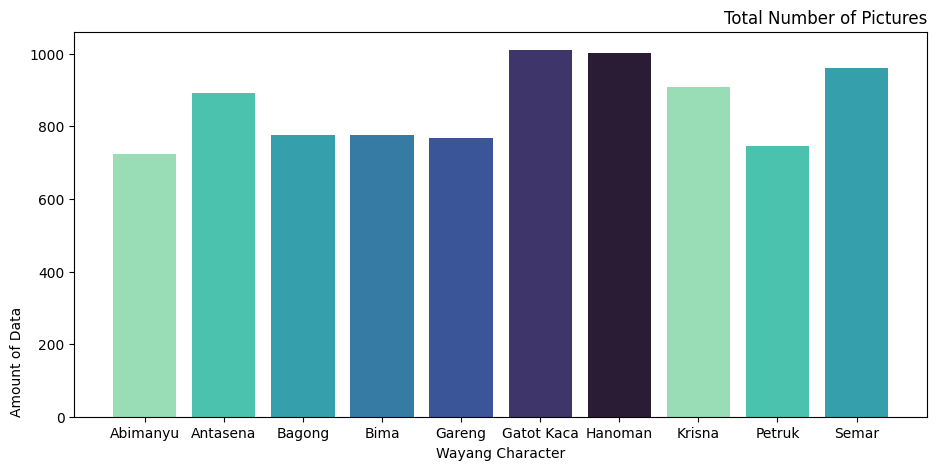

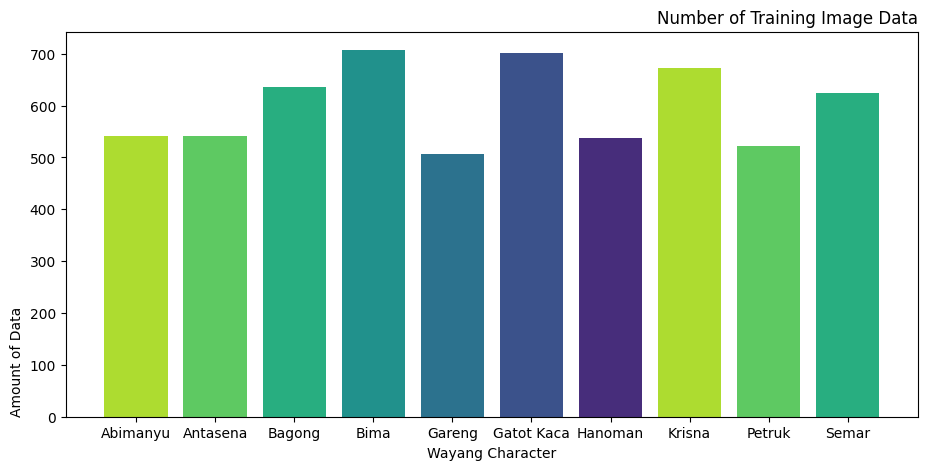

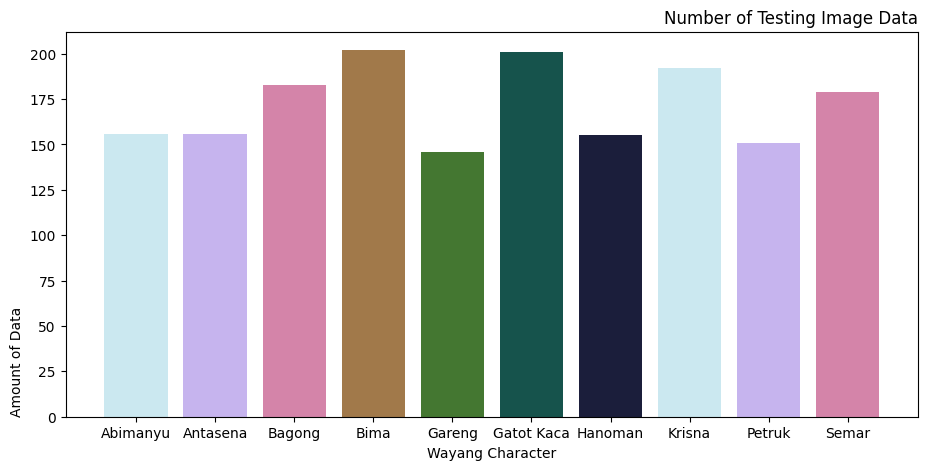

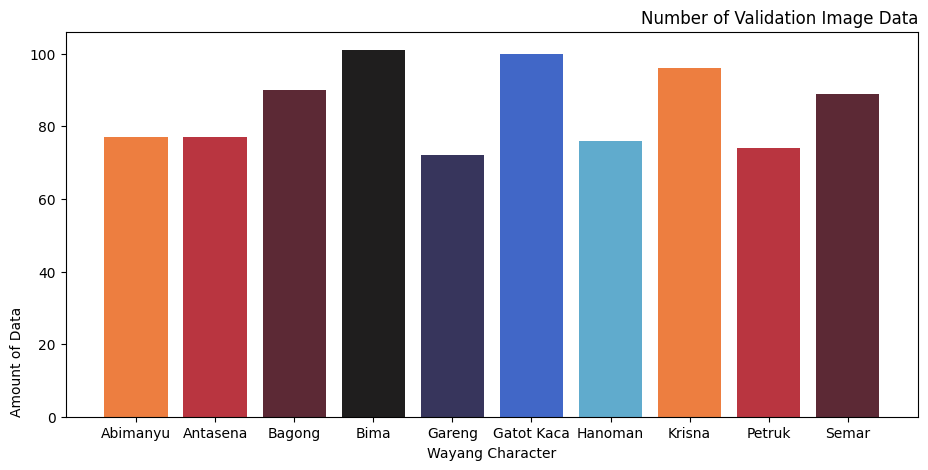

In [76]:
# Visualization of the total number of Images
list_jumlah_file_all = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(base_dir):
    list_file_kelas = os.listdir(os.path.join(base_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_all.append(banyaknya_file) # masukkan jumlahnya ke dalam list
    
x = class_names # variabel yang berisi classnames
y = list_jumlah_file_all # list dari banyaknya jumlah file keseluruhan yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette1)
plt.title('Total Number of Pictures', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

# Visualization for data training
list_jumlah_file_train = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas in os.listdir(train_dir):
    list_file_kelas = os.listdir(os.path.join(train_dir, kelas)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file = len(list_file_kelas)
    list_jumlah_file_train.append(banyaknya_file) # masukkan jumlahnya ke dalam list

x = class_names # variabel yang berisi classname
y = list_jumlah_file_train ## list dari banyaknya jumlah file training yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette2)
plt.title('Number of Training Image Data', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

# Visualization for data testing
list_jumlah_file_test = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(test_dir):
    list_file_kelas1 = os.listdir(os.path.join(test_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file1 = len(list_file_kelas1)
    list_jumlah_file_test.append(banyaknya_file1) # masukkan jumlahnya ke dalam list

x = class_names # variabel yang berisi classname
y = list_jumlah_file_test # list dari banyaknya jumlah file validation yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette3)
plt.title('Number of Testing Image Data', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

# Visualization for data validation
list_jumlah_file_val = []

# loop untuk menyimpan jumlah masing-masing file tiap kelas kedalam list
for kelas1 in os.listdir(val_dir):
    list_file_kelas2 = os.listdir(os.path.join(val_dir, kelas1)) # [img_343.jpg, img_645.jpg, ...]
    banyaknya_file2 = len(list_file_kelas2)
    list_jumlah_file_val.append(banyaknya_file2) # masukkan jumlahnya ke dalam list

x = class_names # variabel yang berisi classname
y = list_jumlah_file_val # list dari banyaknya jumlah file testing yang diambil dari perulangan diatas
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(5)
plt.bar(x, y, color=palette4)
plt.title('Number of Validation Image Data', loc='right')
plt.xlabel('Wayang Character')
plt.ylabel('Amount of Data', loc='bottom')
plt.show()

In [77]:
len(image)

45

In [78]:
label

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 

#### Visualization of Images Based on Their Label Names
- of all classes a sub plot is created 
- which is in the form of a 3x3 matrix
- not using measurements (axis)

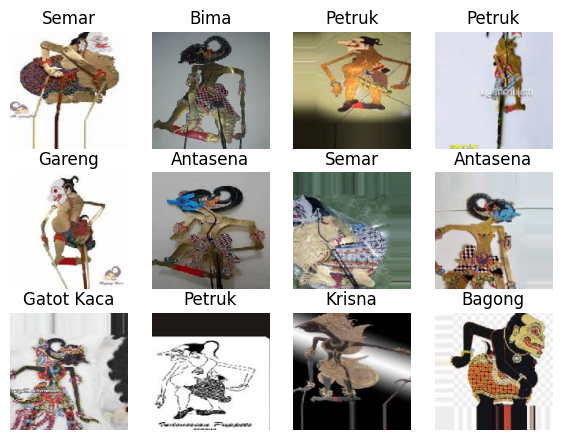

In [83]:
plt.figure(figsize=(7,7))
for i in range(12):
  ax = plt.subplot(4, 4, i + 1)
  plt.imshow(image[i])
  plt.title(class_names[np.argmax(label[i])])
  plt.axis("off")


#### Image Visualization and Display the size of each image (shape)

Ukuran gambar : (45, 150, 150, 3)


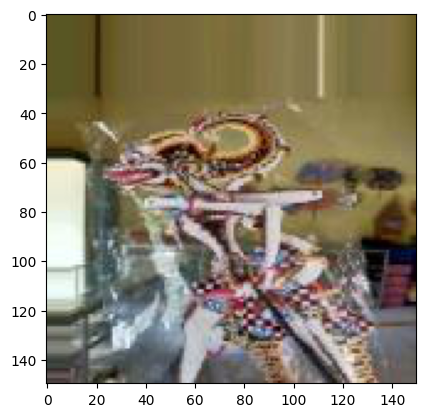

Ukuran gambar : (45, 150, 150, 3)


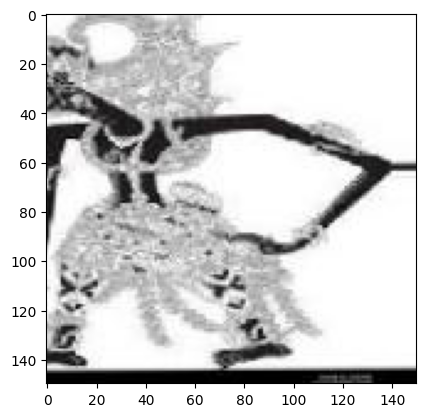

Ukuran gambar : (45, 150, 150, 3)


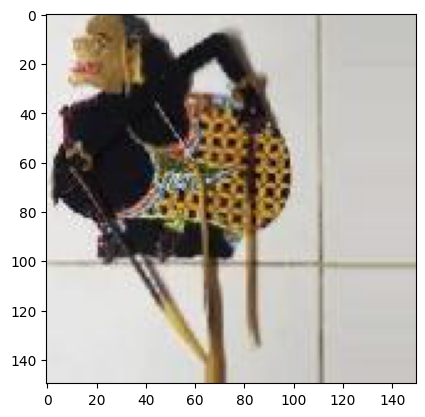

Ukuran gambar : (45, 150, 150, 3)


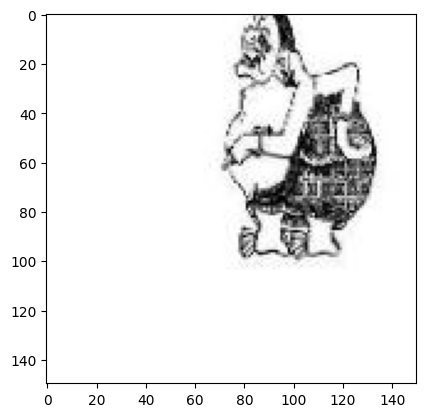

Ukuran gambar : (45, 150, 150, 3)


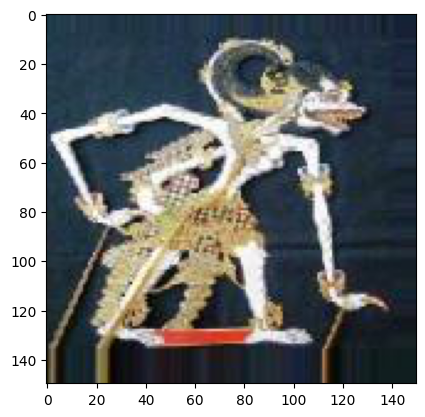

Ukuran gambar : (45, 150, 150, 3)


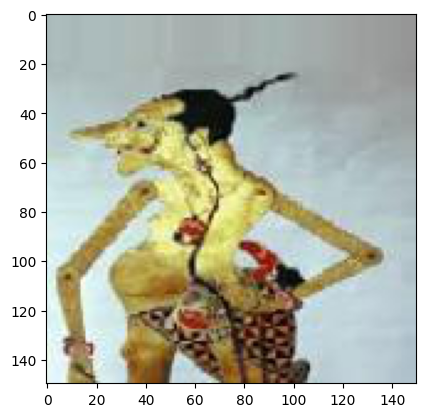

Ukuran gambar : (45, 150, 150, 3)


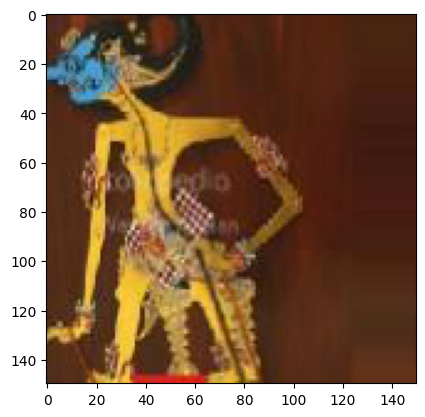

In [84]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print("Ukuran gambar :",img.shape)   #  (32,150,150,3)
  plt.imshow(img[i])
  plt.show()

# Modeling

In [186]:
# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_accuracy
monitor_val_acc = EarlyStopping(monitor='val_accuracy', #dilihat berdasarkan validasi accuracy atau accuracy saja, tetapi monitor hanya bisa memasukkan 1 saja
                                patience=3)#jadi jika di 3 epoch selanjutnya itu tidak berubah maka diberentikan

# Transfer Learning

## Reduce Learning Rate

In [187]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience = 2,
    verbose=1,
    factor=0.3,
    min_lr=0.000001
)

In [188]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(150,150,3))
# base_model.trainable = False

In [189]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(tf.keras.layers.Dense(1024, activation='relu'))
add_model.add(tf.keras.layers.Dense(512, activation='relu'))
add_model.add(Dropout(0.5))      
add_model.add(Dense(10, activation='softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', 
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 global_average_pooling2d_3   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5130      
                                                      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [190]:
history = model.fit(train_generator, 
                              epochs=10, 
                              shuffle=True, 
                              verbose=True,
                              validation_data=validation_generator,
                              callbacks=[reduce_lr,monitor_val_acc])

Epoch 1/10
134/134 [==============================] - 32s 172ms/step - loss: 1.3396 - accuracy: 0.5406 - val_loss: 0.6237 - val_accuracy: 0.8040 - lr: 1.0000e-04
Epoch 2/10
134/134 [==============================] - 20s 151ms/step - loss: 0.2536 - accuracy: 0.9236 - val_loss: 0.1949 - val_accuracy: 0.9308 - lr: 1.0000e-04
Epoch 3/10
134/134 [==============================] - 22s 164ms/step - loss: 0.1068 - accuracy: 0.9698 - val_loss: 0.1311 - val_accuracy: 0.9554 - lr: 1.0000e-04
Epoch 4/10
134/134 [==============================] - 21s 153ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.1102 - val_accuracy: 0.9730 - lr: 1.0000e-04
Epoch 5/10
134/134 [==============================] - 21s 155ms/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.1343 - val_accuracy: 0.9566 - lr: 1.0000e-04
Epoch 6/10
134/134 [==============================] - ETA: 0s - loss: 0.0571 - accuracy: 0.9808
Epoch 6: ReduceLROnPlateau reducing learning rate to 2.9999999242136255e-05.
134/134 [========

In [191]:
add_model.save("Model.h5")

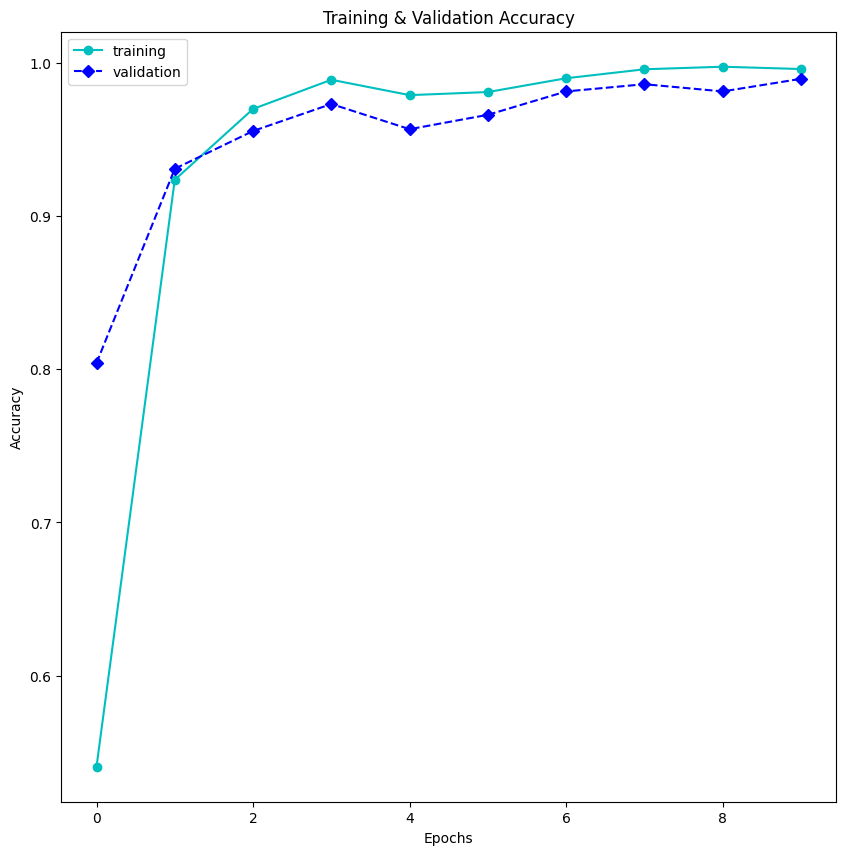

In [193]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         'bD--',
         label='validation')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

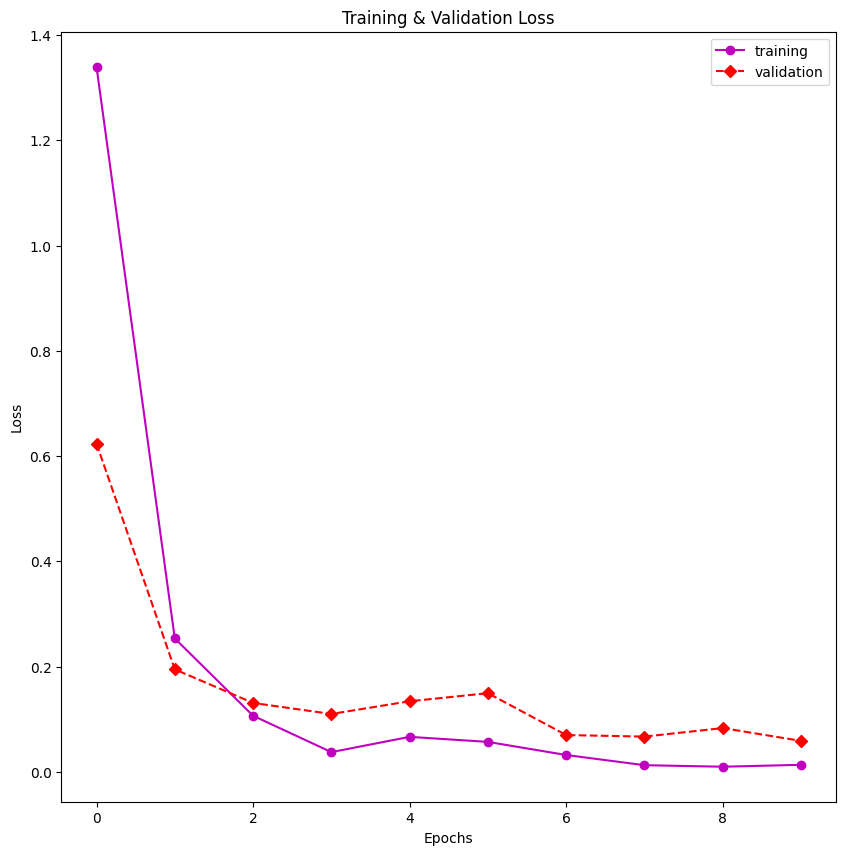

In [194]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.title('Training & Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Evaluate Model
## To test the model using testing data

In [195]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.08880702406167984
Test accuracy : 0.98


# Visualization of the correct prediction result

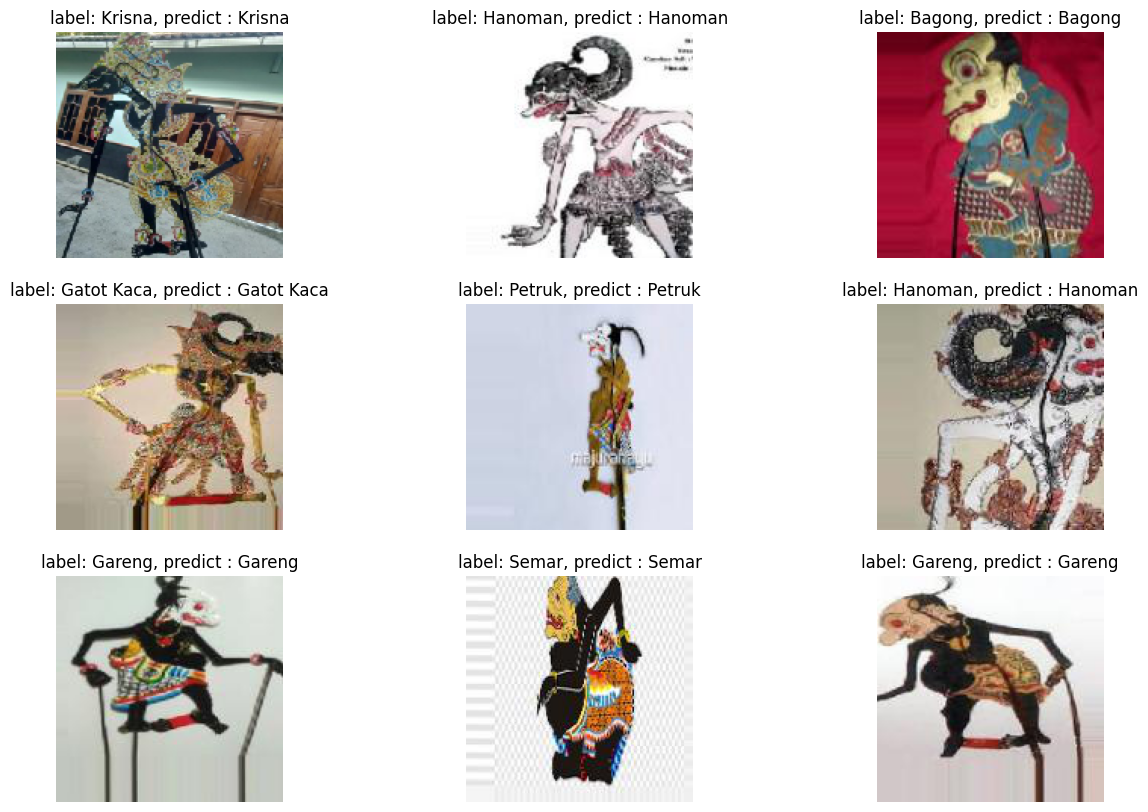

In [196]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_names[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_names[y_pred]}')

# Convusion Matrix

In [208]:
from sklearn.metrics import confusion_matrix

In [209]:
y_pred = model.predict(test_generator)

39/39 [==============================] - 6s 85ms/step


In [210]:
y_pred

array([[1.4107465e-08, 1.2967567e-07, 9.1898545e-07, ..., 1.8767658e-08,
        1.4054297e-05, 2.5710207e-07],
       [4.4321830e-08, 2.7806433e-07, 6.9523981e-06, ..., 9.5594920e-08,
        2.8280588e-06, 9.9998939e-01],
       [7.8780893e-09, 1.9124342e-07, 1.3857387e-07, ..., 1.9641597e-09,
        2.0392207e-07, 9.9999917e-01],
       ...,
       [7.7289202e-05, 4.7099747e-02, 2.1660341e-02, ..., 2.7230668e-03,
        6.7342930e-03, 1.0649674e-02],
       [1.5646670e-07, 1.8838905e-07, 3.7923255e-07, ..., 9.9999607e-01,
        1.7120881e-06, 7.1570901e-07],
       [3.9892293e-05, 4.0998682e-03, 2.9511198e-01, ..., 6.1505474e-04,
        7.8284706e-04, 4.6030098e-01]], dtype=float32)

In [211]:
import matplotlib

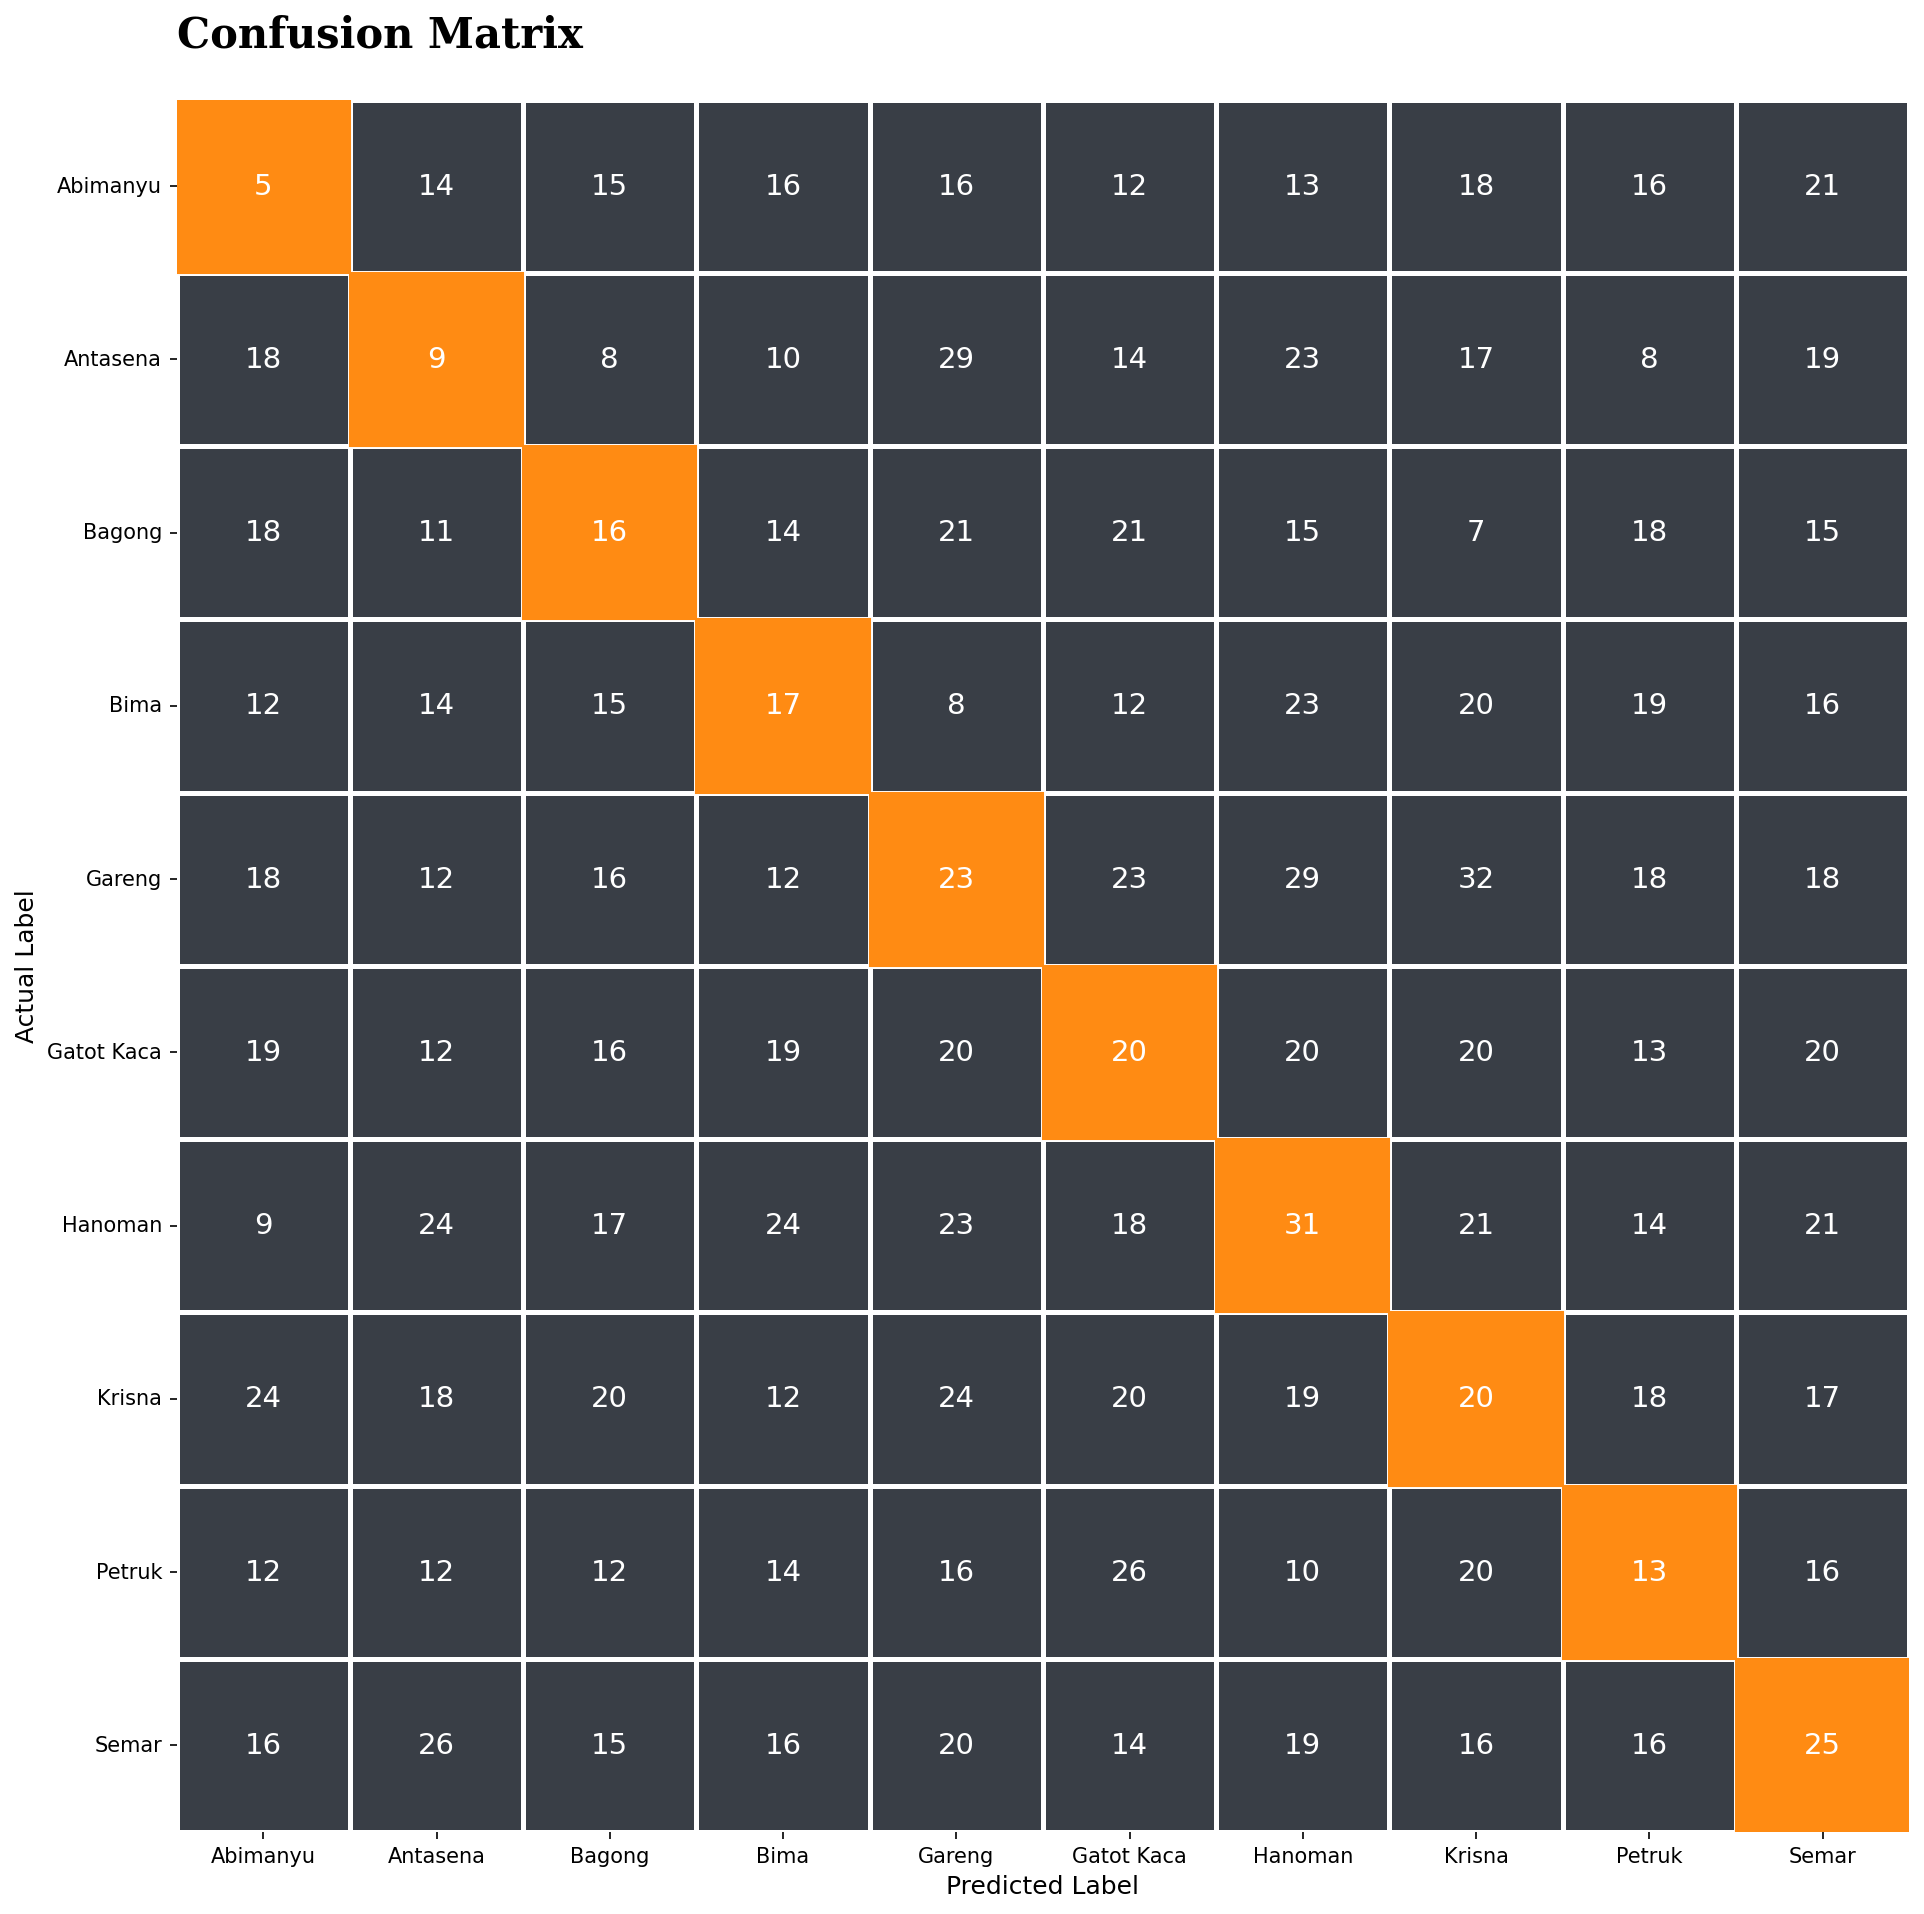

In [212]:
#Confusion Matrix
fig, ax = plt.subplots(figsize=(20, 15),dpi=150)
cm = confusion_matrix(test_generator.labels, y_pred.argmax(axis=1))

colors = ["#393E46","#393E46"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


ax.text(0,-0.3,'Confusion Matrix ',fontfamily='serif',fontsize=20,fontweight='bold')
sns.heatmap(ax=ax, data=cm,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,linewidth=1.5, annot=True,cmap=colormap, 
            annot_kws={"fontsize":14},fmt='')
ax.set_xticklabels(['Abimanyu', 'Antasena', 'Bagong', 'Bima', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Krisna', 'Petruk', 'Semar'])
ax.set_yticklabels(['Abimanyu', 'Antasena', 'Bagong', 'Bima', 'Gareng', 'Gatot Kaca', 'Hanoman', 'Krisna', 'Petruk', 'Semar'])
plt.yticks(rotation=0)

ax.set_ylabel("Actual Label",fontsize=12)
ax.set_xlabel("Predicted Label",fontsize=12)

from matplotlib.patches import Rectangle
for i in range(0,10):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=True,color="#FF8B13"))

plt.show()

The **orange box** showed the amount of correct prediction of each label